# Suicide Rates Overview 1985 to 2016

Executive Summary

<span style='color:purple'>Problem and Our Approach
Suicide is a public health problem that has increased in recent years, the World Health Organization (WHO) reports 804,000 suicides annually. Suicide, as other non-communicable diseases, is a multifactorial and multilevel phenomenon; caused by individual factors such as mental disorders (depression, psychosis, and substance abuse), and social factors such as stress, social exclusion, unemployment, working conditions, social support and violence, factors that are considered as social determinants that influence people's health. The suicide rate in lot of countries have been quite high for many years, including the developing and developed countries.

<span style='color:purple'>Here we will analyse the dataset to find out if the GDP rate in these countries the only factor for increasing number of suicide rate.So the other factors we are analysing are HDI growth rate , rate of sex, the age and generation in top countries impacting the suicide rate.

<span style='color:purple'>Tools and Methods Utilized
Our team utilized Jupyter to present the data in a meaningful way. Our team created visuals which included line graphs, scatterplots, box-and-whisker plots, heatmaps, histogram and bar graphs to display this data.>



#Data Description 

Our team retrieved the original dataset from Kaggel

1. country: name of suicide country
2. year: year of suicide
3. sex: gender
4. age: age range of the person who committed suicide
5. suicides_no: the raw number of reported suicides
6. population: population of that country
7. suicides_100k: (total suicides / total population) * 100k
8. HDI for year: Human Development Index in a given year
9. gdp_for_year: monetary measure of the market value of all the final goods and services produced in a            given year
10. gdp_per_capita: gdp_for_year/total_population of that year
11. generation: name of the generation


Data reading

<span style='color:purple'>Initially we imported essential libraries like pandas, numpy, seaborn, matplotlib and warnings. seaborn libraries.
We used pandas for various data manipulation operations such as merging, reshaping, selecting, as well as data cleaning, and data wrangling features.
We used numpy to perform a wide variety of mathematical operations on arrays.
Matplotlib for data visualization and graphical plotting library for Python and warnings to filter any warnings while generating the visual part.
Also we read the csv file and stored it using read_csv()<span style='color:purple'>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import warnings as w
from matplotlib.pyplot import figure
%matplotlib inline

s1=pd.read_csv('master.csv')
s1=s1[0:27821]
s1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Data cleaning : 
<span style='color:purple'>is the process of detecting and correcting (or removing) corrupt or \inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

<span style='color:purple'>Dealing with missing data/value is one of the most tricky but common parts of data cleaning. While many models can live with other problems of the data, most models don’t accept missing data. Here we used heatmap to visualize missing data in first 30 columns.

<AxesSubplot:>

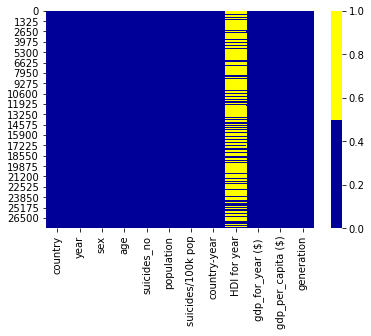

In [52]:
cols = s1.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(s1[cols].isnull(), cmap=sns.color_palette(colours))

<span style='color:purple'>This provides the total info of the dataset like now many columns are there
with non null values and what is the
data type of those columns and the memory usage of data set<span style='color:purple'>

In [53]:
s1['Year'] = s1['year'].astype(str)
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  Year                27820 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 2.8+ MB


<span style='color:purple'>To check the count of non null values. Detect missing values for an array-like object. This function takes a scalar or array-like object and indicates whether values are missing ( NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

In [54]:
s1.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
Year                      0
dtype: int64

<span style='color:purple'>isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False.

In [55]:
s1.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
Year                      0
dtype: int64

In [56]:
#renaming the colums for representing data in more presentable way
s1.rename(
    columns={"HDI for year":"HDI_for_year","suicides/100k pop":"suicides100kpop"," gdp_for_year ($) ":"gdp_for_year ($)"},
    inplace=True)

In [58]:
print(s1.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides100kpop', 'country-year', 'HDI_for_year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation', 'Year'],
      dtype='object')


Data cleaning part , 
<span style='color:purple'>here we took the mean value of HDI for the missing values.
When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something.

In [59]:
cols = ['HDI_for_year']
for column in cols:
    s1[column].fillna(s1[column].mean(),inplace=True)

<span style='color:purple'>Now after the above step , we see that the null value count is zero

In [60]:
s1.isna().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides100kpop       0
country-year          0
HDI_for_year          0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
Year                  0
dtype: int64

In [61]:
s1.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides100kpop       0
country-year          0
HDI_for_year          0
gdp_for_year ($)      0
gdp_per_capita ($)    0
generation            0
Year                  0
dtype: int64

 <span style='color:purple'>display of dataset

In [62]:
s1

,country,year,sex,age,suicides_no,population,suicides100kpop,country-year,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation,Year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X,1987
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent,1987
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X,1987
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation,1987
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation X,2014
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675000,"63,067,077,179",2309,Silent,2014
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z,2014
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z,2014


<span style='color:purple'>Droped unwanted column (country-year)

In [63]:
s1.drop('country-year',inplace=True, axis=1)
s1

,country,year,sex,age,suicides_no,population,suicides100kpop,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation,Year
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X,1987
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent,1987
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X,1987
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation,1987
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers,1987
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675000,"63,067,077,179",2309,Generation X,2014
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675000,"63,067,077,179",2309,Silent,2014
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675000,"63,067,077,179",2309,Generation Z,2014
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675000,"63,067,077,179",2309,Generation Z,2014


In [64]:
s1.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [66]:
#Selecting 10 countries to start the visualization 
Countries=['Australia','Canada','Germany','Japan','New Zealand','South Africa','Sri Lanka','United Arab Emirates','United Kingdom','United States']

In [67]:
s1_new=s1[s1.country.isin(Countries)]
s1_new

,country,year,sex,age,suicides_no,population,suicides100kpop,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation,Year
1426,Australia,1985,male,75+ years,67,219000,30.59,0.776601,"180,190,994,861",12374,G.I. Generation,1985
1427,Australia,1985,male,25-34 years,357,1299100,27.48,0.776601,"180,190,994,861",12374,Boomers,1985
1428,Australia,1985,male,55-74 years,282,1177400,23.95,0.776601,"180,190,994,861",12374,G.I. Generation,1985
1429,Australia,1985,male,15-24 years,315,1355800,23.23,0.776601,"180,190,994,861",12374,Generation X,1985
1430,Australia,1985,male,35-54 years,411,1906800,21.55,0.776601,"180,190,994,861",12374,Silent,1985
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,0.776601,"18,120,714,000,000",60387,Millenials,2015
27216,United States,2015,female,15-24 years,1132,21633813,5.23,0.776601,"18,120,714,000,000",60387,Millenials,2015
27217,United States,2015,female,75+ years,540,11778666,4.58,0.776601,"18,120,714,000,000",60387,Silent,2015
27218,United States,2015,male,5-14 years,255,21273987,1.20,0.776601,"18,120,714,000,000",60387,Generation Z,2015


In [68]:
#New data info about the countries we previously selected
s1_new.info()
type(s1_new)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 1426 to 27219
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             2928 non-null   object 
 1   year                2928 non-null   int64  
 2   sex                 2928 non-null   object 
 3   age                 2928 non-null   object 
 4   suicides_no         2928 non-null   int64  
 5   population          2928 non-null   int64  
 6   suicides100kpop     2928 non-null   float64
 7   HDI_for_year        2928 non-null   float64
 8   gdp_for_year ($)    2928 non-null   object 
 9   gdp_per_capita ($)  2928 non-null   int64  
 10  generation          2928 non-null   object 
 11  Year                2928 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 297.4+ KB


pandas.core.frame.DataFrame

BAR CHART
<span style='color:purple'>Here we are decribing top 10 countires suicide rates using a bar chart. 
    We used suicides100kpop column in our y axis and countries in our x axis. 
    We previously selected 10 countries from our data set to proceed with analysis.
    We can see Sri lanka has highest rate number of suicides and South Africa has the least.
    As Bar chart is used for comparison purpose we choose this chart over the other options of charts to compare the suicide rate in differnt countries.<span style='color:purple'>

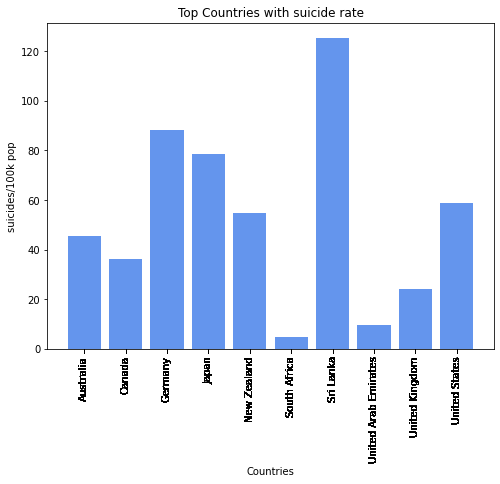

In [69]:
Countries = s1_new['country']
height = s1_new['suicides100kpop']
plt.figure(figsize=(8,6))
plt.bar(Countries, height, width =0.8, color = ['cornflowerblue'])
plt.xticks(s1_new["country"], rotation = 90)
plt.xlabel('Countries')
plt.ylabel('suicides/100k pop')
plt.title('Top Countries with suicide rate')
plt.show()

PIE CHART
<span style='color:purple'>Suicides can impact anyone regardless of age and generations. In the below pie chart, we used age groups and 
generations from data set started by grouping them and then defining the slices and labels from the list.<span style='color:purple'>

<span style='color:purple'>From age pie chart, we can see 35- 54 years age group are committing more sucidies compare to other. This could be because of amount of stress caused by economical and mental stress. Bommers generation have the highest suicides comparitvely.
    As pie chart is used to study parts of a whole for this purpose we choose pie chart over the other options of charts to understand the Age and generation based suicides.
    <span style='color:purple'>

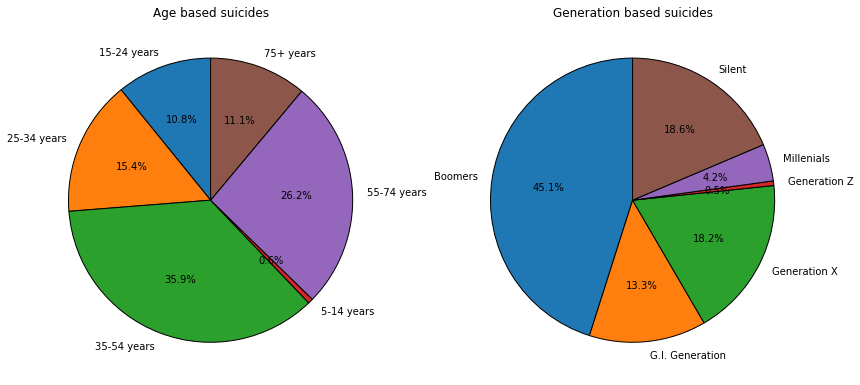

In [70]:
#used pie charts to construct Age based and Generation based suicides
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
s3=s1_new.groupby("age").sum().reset_index()
slices=list(s3["suicides_no"])
labels=list(s3.age)
plt.pie(slices,labels=labels,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("Age based suicides")
plt.tight_layout()


s4=s1_new.groupby("generation").median().reset_index()
slices=list(s4["suicides_no"])
labels=list(s4.generation)
plt.subplot(1, 2, 2)
plt.pie(slices,labels=labels,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title("Generation based suicides")
plt.tight_layout()
plt.show()


In [71]:
s3

,age,year,suicides_no,population,suicides100kpop,HDI_for_year,gdp_per_capita ($)
0,15-24 years,976260,273745,2681479182,5741.18,390.269986,14297908
1,25-34 years,976260,388967,2799650679,7118.69,390.269986,14297908
2,35-54 years,976260,906088,5285617137,7841.60,390.269986,14297908
3,5-14 years,976260,14460,2520199998,277.38,390.269986,14297908
4,55-74 years,976260,661653,3563994282,7795.82,390.269986,14297908
5,75+ years,976260,279708,1211433221,11046.93,390.269986,14297908


LINE CHART<span style='color:purple'> We have created a line graph to know the number of male and female suicides happened over the years. we used
seaborn libraries which we imported as sns. Here we also used warnings filter which we imported at the
start of the program. 
    
<span style='color:purple'>As line chart is used to study study changes of one or more variable over time , for this purpose we choose line chart over the other options of charts to understand the suicides in male and female over the years 1985 to 2016 suicides
    
<span style='color:purple'>We could see there are more suicides over male compared to females. One key element is communication. It’s too 
simplistic to say women are willing to share their problems and men tend to bottle them up. But it is true that,
for generations, many societies have encouraged men to be “strong” and not admit they’re struggling.

<span style='color:purple'>"Men seek help for mental health less often,” Harkavy-Friedman says. “It's not that men don't have the same issues
as women – but they're a little less likely to know they have whatever stresses or mental health conditions that
are putting them at greater risk for suicide."




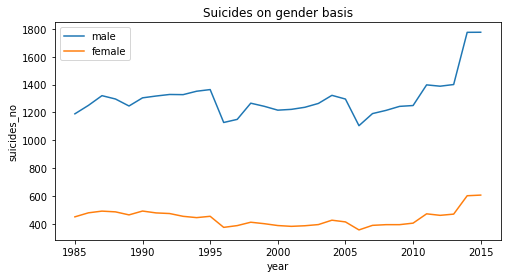

In [72]:
#Male and Female suicides on Line plot

w.filterwarnings('ignore')
men = s1_new[s1_new.sex == "male"]
women = s1_new[s1_new.sex == "female"]
plt.figure(figsize=(8,4))
sns.lineplot(men.year, men.suicides_no, ci = None)
sns.lineplot(women.year, women.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.title('Suicides on gender basis')
plt.show()

In [40]:
# For histogram assigning age column to E variable
E=s1_new[s1_new["age"]=='35-54 years']
E

,country,year,sex,age,suicides_no,population,suicides100kpop,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation,Year
1430,Australia,1985,male,35-54 years,411,1906800,21.55,0.776601,"180,190,994,861",12374,Silent,1985
1433,Australia,1985,female,35-54 years,143,1832700,7.80,0.776601,"180,190,994,861",12374,Silent,1985
1441,Australia,1986,male,35-54 years,487,1972000,24.70,0.776601,"181,977,476,217",12288,Silent,1986
1443,Australia,1986,female,35-54 years,169,1888100,8.95,0.776601,"181,977,476,217",12288,Silent,1986
1452,Australia,1987,male,35-54 years,554,2031000,27.28,0.776601,"189,041,159,344",12564,Silent,1987
...,...,...,...,...,...,...,...,...,...,...,...,...
27189,United States,2013,female,35-54 years,3776,41983845,8.99,0.913000,"16,691,517,000,000",56520,Generation X,2013
27198,United States,2014,male,35-54 years,11455,41858354,27.37,0.915000,"17,427,609,000,000",58531,Generation X,2014
27201,United States,2014,female,35-54 years,4018,41742299,9.63,0.915000,"17,427,609,000,000",58531,Generation X,2014
27210,United States,2015,male,35-54 years,11634,41658010,27.93,0.776601,"18,120,714,000,000",60387,Generation X,2015


HISTOGRAM 
<span style='color:purple'>A histogram is used for showing the frequencies of distribution of data. It is the graphical distribution representation of data where the data is grouped into continuous number ranges and each range corresponds to a vertical bar.
Selected 35-54 years age group to establish the frequency of suicides.<span style='color:purple'>
    

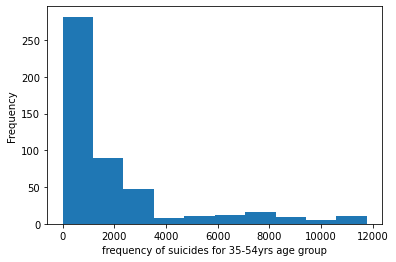

In [73]:
#suicides_no for 35-54 years age group 
E.suicides_no.plot(kind = 'hist',bins = 10,figsize = (6,4))
plt.xlabel('frequency of suicides for 35-54yrs age group')
plt.show()

<span style='color:purple'>The most important thing to know about bar charts is how to read them. Bar graphs or charts present what’s 
called ‘categorical data’ – a grouping of data into discrete groups such as days of the week, months of the 
year, age groups and so on. In a column bar chart, the categories appear along the horizontal axis; and the
height of the bar corresponds to the value of each category – for example, the share price, net profit, 
total sales, or whatever else is being recorded.<span style='color:purple'>

<span style='color:purple'>Here we used bar chart to construct the top countries with highest rate of suiciding. On x axis we used suicides 
per 100k population coulmn and on y axis we used top countries which we defined earlier in the program.<span style='color:purple'>

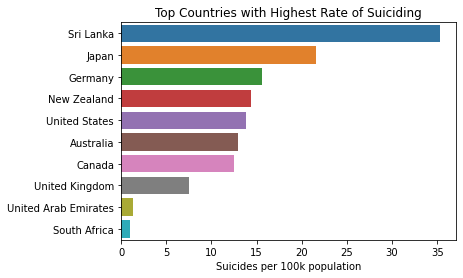

In [74]:
#Top Countries with Highest Rate of Suiciding
df = s1_new.groupby("country").mean().reset_index().sort_values("suicides100kpop", ascending=False)
plt.figure(figsize=(6,4))
plt.style.use('default')
sns.barplot(x="suicides100kpop", y="country",  data=df.iloc[:10])
plt.title("Top Countries with Highest Rate of Suiciding")
plt.ylabel("")
plt.xlabel("Suicides per 100k population")
plt.show()

<span style='color:purple'>Gross domestic product (GDP) is the monetary value of all finished goods and services made within a country 
during a specific period. GDP provides an economic snapshot of a country, used to estimate the size of an
economy and growth rate. GDP can be calculated in three ways, using expenditures, production, or incomes. It can
be adjusted for inflation and population to provide deeper insights.
We calculated gdp_per_capita for top countries. we can see Japan has highest gdp, but at the same time suicide rating 
also high in Japan. This reveals that even though the economic conditions are good, economy is running high
still we can see the suicides are definetly high. As mentioned earlier suicide depends on so many factors and one's
mental health also plays an important factor in this.<span style='color:purple'>

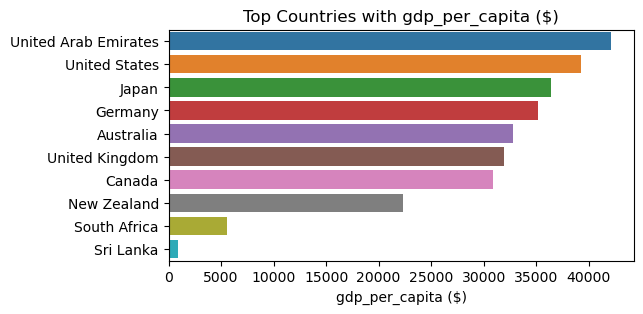

In [75]:
#Top Countries with gdp_per_capita
df = s1_new.groupby("country").mean().reset_index().sort_values("gdp_per_capita ($)", ascending=False)
plt.figure(figsize=(6,3))
plt.style.use('default')
sns.barplot(x="gdp_per_capita ($)", y="country",  data=df.iloc[:10])
plt.title("Top Countries with gdp_per_capita ($)")
plt.ylabel("")
plt.xlabel("gdp_per_capita ($)")
plt.show()

BOX PLOT
<span style='color:purple'>The box and whisker plot, sometimes simply called the box plot, is a type of graph that help visualize
the five-number summary. It doesn’t show the distribution in as much detail as histogram does, but it’s especially
useful for indicating whether a distribution is skewed and whether there are potential unusual 
observations (outliers) in the data set. A box plot is ideal for comparing distributions because the centre, 
spread and overall range are immediately apparent.
    Here we can see the variations in HDI among different countires. For example HDI in South Africa has varied more comparitevly and Sri lanka's Hdi measure was so low that it is seen as outliers in the box plot.<span style='color:purple'>



(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

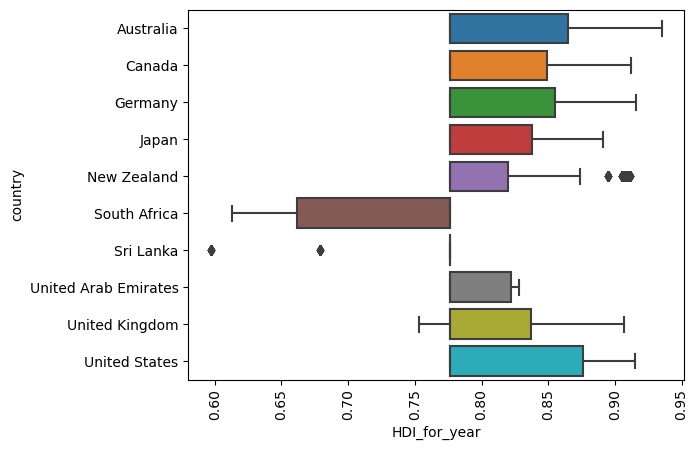

In [76]:
#HDI_per_year for top countries on box plot
sns.boxplot(x=s1_new['HDI_for_year'],y=s1_new['country'])
plt.xticks(rotation=90)

SCATTER PLOT:
<span style='color:purple'>A scatter plot is a type of data visualization that shows the relationship between 
different variables. This data is shown by placing various data points between an x- and y-axis.
Essentially, each of these data points looks “scattered” around the graph, giving this type of data visualization 
its name. We used gdp_per_capita over the years column, how it has been changed and what kind of effect will be there 
if the country gdp is good.<span style='color:purple'>

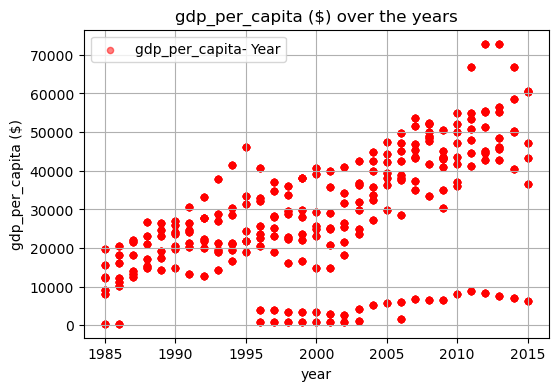

In [77]:
#gdp_per_capita over the years
s1_new.plot(kind='scatter',x='year',y='gdp_per_capita ($)',alpha=0.5,color='red',
        figsize=(6,4),
        grid=True,label='gdp_per_capita- Year')
plt.xlabel('year')
plt.ylabel('gdp_per_capita ($)')
plt.legend()
plt.title('gdp_per_capita ($) over the years')
plt.show()

HEATMAP
<span style='color:purple'> Heatmap is used to show the patterns in the data.
    Here we are visualising suicide patterns in generation.
    

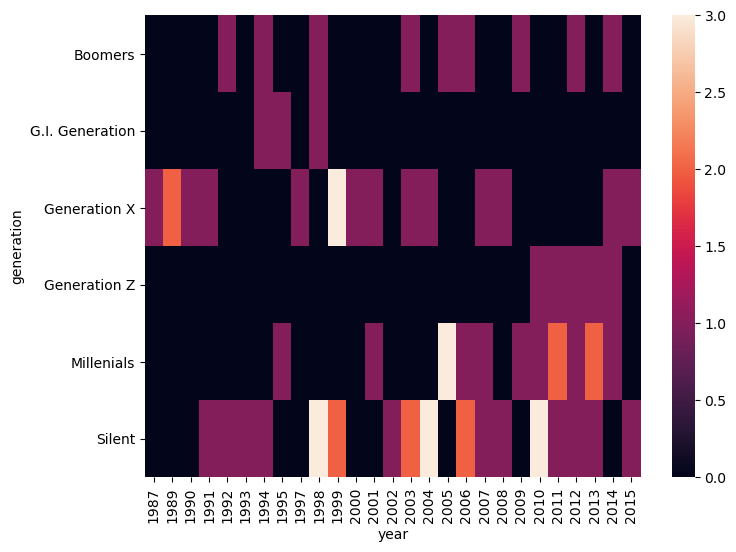

In [79]:
# generation heat map
plt.figure(figsize=(8,6))
rand=s1_new.sample(75)
h=pd.crosstab(rand["generation"],rand["year"])
sns.heatmap(h, annot= False)
plt.show()

CONCLUSION
<span style='color:purple'>
    In general, the suicide rate is related to several factors. First, national GDP per capita. We have seen that the suicide rate in many countries is highly correlated with the gdp of the whole country, which shows that the degree of national wealth has a certain degree of reduction in suicide rate.<span style='color:purple'> But this is not the only factor impacting the suicide rate.

<span style='color:purple'>To conclude, we see that each level of age has different suicide rates.The suicide rate of among 35-54years is the highest. This shows that gdp is not the only factor impacting the suicide rate.
    After analysis we see that the boomers generation too have the highest suicide rate compared to other generation.
    Even the Human developemnt index affects the suicide rate , this factor in itself includes the human health and education factors in a year specific to a country.<span style='color:purple'>

<span style='color:purple'>Third, the social pressure. A healthy society can make citizens feel safe and satisfied, so how to relieve the social pressure becomes a significant topic for every country. Our purpose is not only reduce the suicide rate but also to build a better world.This is included in the HDI factor.<span style='color:purple'>
    <span style='color:purple'>Like homicide and traffic accident rates, suicide rates vary with age groups, sex, and race. Suicide rates increased during periods of industrial or economic-financial crises. The reason for this would be the fact that in the anomic state, that is, of disturbance of the collective order, society leaves individual passions without
restraint.<span style='color:purple'>
        So we conclude that suicide rate is not alone based on GDP rate, Suicide rates vary with age groups, sex, and race and HDI factor.

RECOMMENDATION
<span style='color:purple'>After working on the dataset of Suicide Rate Overview 1985 to 2016. We think that we could analyse the data better if the dataset had columns which had data about mental illness , education level in each country over the years and measures taken to bring down the suicde rate. As we worked on the dataset, we felt that with inclusion of few more aspects missing such as education lvel , mental illness and measures taken by each country over the years could possibly let us understand the suicide rate better.So our reccomendation for the dataset is the inclusion of those areas.


THANK YOU 
